In [1]:
import copy

import numpy as np
import cv2
import pandas as pd
import os
from os import listdir
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score
import skimage
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

PATH = "C:/Users/cubix/Desktop/analiza-obrazow-cyfrowych-projekt/data/DATASET/"
os.listdir(PATH)

['downdog', 'goddess', 'plank', 'tree', 'warrior']

In [2]:
dataset = []
labels = []

for classes in os.listdir(PATH):
    for image in os.listdir(PATH + classes):
        img = cv2.imread(PATH + classes + '/' + image, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        resized = cv2.resize(img, (100, 100))
        # flipped = cv2.flip(resized, 1)
        dataset.append(resized)
        # dataset.append(flipped)
        labels.append(classes)
        # labels.append(classes)

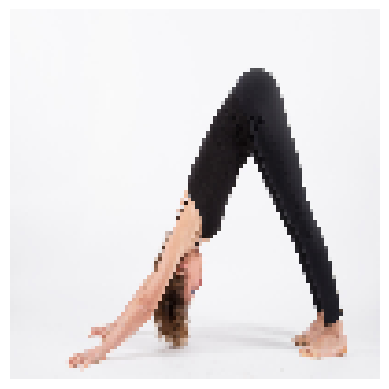

In [3]:
plt.axis('off')
plt.imshow(dataset[0])
plt.show()

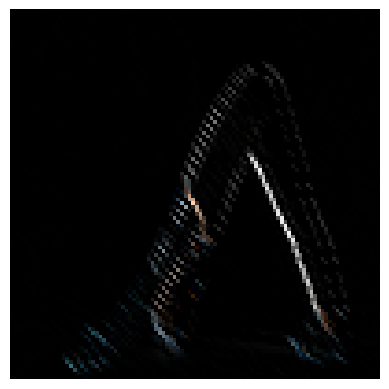

In [4]:
kernel = cv2.getGaborKernel((5,5), sigma=1, theta=150, lambd=1, gamma=0.75, ktype=cv2.CV_32F)
fimg = cv2.filter2D(dataset[0], cv2.CV_8UC3, kernel)
plt.axis('off')
plt.imshow(fimg)
plt.show()

In [5]:
fimg = fimg.reshape(-1)
fimg.shape

(30000,)

In [6]:
# fd, hog_sample = hog(fimg, orientations=9, pixels_per_cell=(6, 6), #to run faster make pixels_per_cell and cells_per_block = 6, 6
#                         cells_per_block=(3, 3), visualize=True, channel_axis=-1) #channel_axis = -1 if RGB, else None

In [7]:
# plt.axis('off')
# plt.imshow(hog_sample)
# plt.show()

In [8]:
gabored_samples = []

for sample in tqdm(range(len(dataset))):
    gabored_sample = []
    for sigma in range(1,3):
        for theta in (0, 45, 90):
            # theta = 180/theta
            for lambd in np.arange(1, 2*np.pi, np.pi/2):
                for gamma in np.random.uniform(0.05, 0.1, size=1):
                    kernel = cv2.getGaborKernel((5,5), sigma=sigma, theta=theta, lambd=lambd, gamma=gamma)
                    processed_img = cv2.filter2D(dataset[sample], cv2.CV_8UC3, kernel)
                    flattened_img = processed_img.reshape(-1)
                    gabored_sample.append(flattened_img)
    gabored_samples.append(gabored_sample)

100%|██████████| 1551/1551 [00:05<00:00, 293.20it/s]


In [9]:
gabored_array = np.asarray(gabored_samples)

In [10]:
gabored_array.shape

(1551, 24, 30000)

In [11]:
gabored_array = np.reshape(gabored_array, newshape=(gabored_array.shape[0], gabored_array.shape[1] * gabored_array.shape[2]))

In [12]:
gabored_array.shape

(1551, 720000)

In [13]:
labels_array = np.array(labels)
labels_encoded = OneHotEncoder().fit_transform(np.reshape(labels_array, newshape=(len(labels_array), 1))).toarray()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(gabored_array, labels_array, test_size=0.2, stratify=labels_array)
tree = RandomForestClassifier().fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [20]:
y_pred

array(['tree', 'warrior', 'plank', 'downdog', 'warrior', 'downdog',
       'warrior', 'warrior', 'downdog', 'tree', 'goddess', 'downdog',
       'plank', 'warrior', 'tree', 'warrior', 'warrior', 'downdog',
       'warrior', 'tree', 'tree', 'tree', 'downdog', 'plank', 'goddess',
       'downdog', 'warrior', 'downdog', 'warrior', 'warrior', 'warrior',
       'warrior', 'plank', 'plank', 'downdog', 'plank', 'plank',
       'goddess', 'plank', 'plank', 'downdog', 'downdog', 'warrior',
       'tree', 'warrior', 'plank', 'downdog', 'warrior', 'tree', 'plank',
       'warrior', 'plank', 'tree', 'warrior', 'plank', 'downdog',
       'warrior', 'plank', 'goddess', 'downdog', 'plank', 'downdog',
       'plank', 'downdog', 'plank', 'goddess', 'warrior', 'plank', 'tree',
       'downdog', 'warrior', 'plank', 'warrior', 'downdog', 'plank',
       'downdog', 'plank', 'goddess', 'warrior', 'goddess', 'tree',
       'goddess', 'plank', 'downdog', 'downdog', 'plank', 'plank',
       'downdog', 'downdog

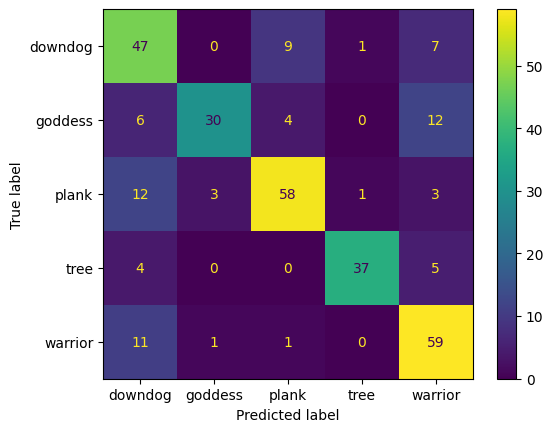

In [21]:
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(cm, display_labels=os.listdir(PATH))
display.plot()
plt.show()

In [22]:
print(balanced_accuracy_score(y_test, y_pred))

0.7376674201402462
